# Gradient Descent를 이용한 Linear Regression

In [1]:
import copy, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('reg_data/mlb_sample.csv')
print(df)

     ID  YEAR NAME        wp   w  ps  ws  AL         rev     smsa
0     1  2000   AZ  0.524691  85   0   0   0  141.191894  3278661
1     1  2001   AZ  0.567901  92   1   1   0  134.330353  3388445
2     1  2002   AZ  0.604938  98   1   0   0  153.936188  3496957
3     1  2003   AZ  0.518519  84   0   0   0  144.580612  3600163
4     1  2004   AZ  0.314815  51   0   0   0  145.447601  3723359
..   ..   ...  ...       ...  ..  ..  ..  ..         ...      ...
445  30  2010  WAS  0.425926  69   0   0   0  194.000000  5664789
446  30  2011  WAS  0.496894  80   0   0   0  193.880118  5771506
447  30  2012  WAS  0.604938  98   1   0   0  213.692866  5862594
448  30  2013  WAS  0.456790  74   0   0   0  228.392639  5949859
449  30  2014  WAS  0.592593  96   1   0   0  264.353845  6033737

[450 rows x 10 columns]


In [3]:
df['smsa'] = df['smsa']/1000000
columns = ['wp', 'ps', 'ws', 'AL', 'smsa']
X = df[columns].to_numpy()
y = np.ravel(df['rev'])

# Cost를 계산합니다.
코스트 함수 $J(\mathbf{w},b)$ 는 아래와 같이 계산합니다.\
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ \
이 때:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ \
로 나타낼 수 있습니다. 각 데이터 포인트의 코스트를 각각 구한 후 모두 더해서 데이터 포인트의 값으로 나누면 됩니다.


In [4]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

초기값을 투입하여 코스트를 계산해봅니다.

In [5]:
X_train = X
y_train = y
w_init = np.array([1,1,1,1,1])
b_init = 1

In [6]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 15975.417123234021


# Gradient Descent를 구해봅니다.
GD는 다음과 같은 식을 최적화 하는 문제입니다.:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [7]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [8]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: {tmp_dj_dw}')

dj_db at initial w,b: -169.82301601585786
dj_dw at initial w,b: [  -85.84110255   -53.45457012   -13.31519968   -81.55742741
 -1088.47207987]


In [9]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

트레이닝을 통해 계수를 추정해봅니다.

In [10]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.01
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost  7432.81   
Iteration  100: Cost  2357.45   
Iteration  200: Cost  1607.75   
Iteration  300: Cost  1364.88   
Iteration  400: Cost  1274.43   
Iteration  500: Cost  1233.79   
Iteration  600: Cost  1211.94   
Iteration  700: Cost  1198.65   
Iteration  800: Cost  1190.01   
Iteration  900: Cost  1184.21   
b,w found by gradient descent: 103.99,[48.98259532 20.93717287  6.18568994 12.33315909  6.3415277 ] 


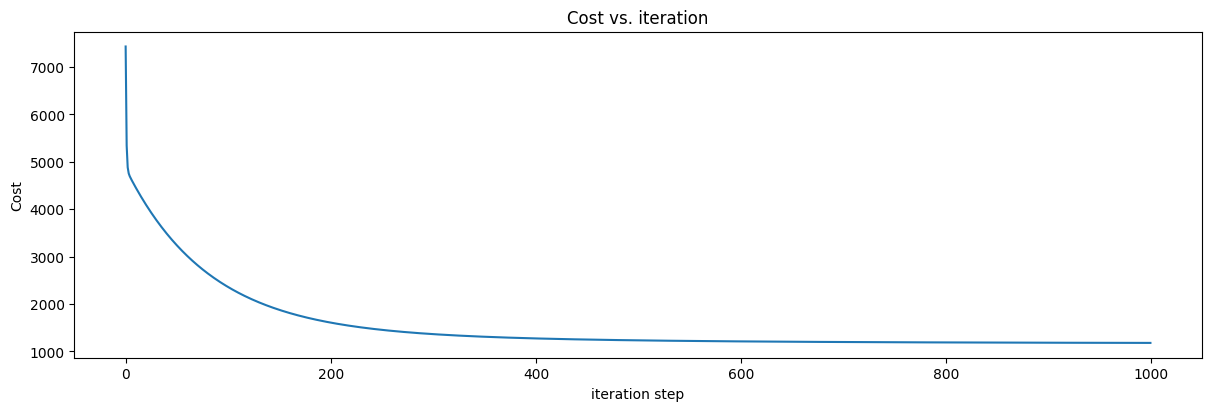

In [11]:
# plot cost versus iteration  
fig, ax1 = plt.subplots(1, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax1.set_title("Cost vs. iteration")
ax1.set_ylabel('Cost')             
ax1.set_xlabel('iteration step')   
plt.show()

In [12]:
alphas = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0.00001])
for alpha in alphas:
    w_final, b_final, J_hist  = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
    print(f"w found by gradient descent when alpha is {alpha} : {w_final}" )

Iteration    0: Cost 36538741.29   
Iteration  100: Cost      inf   


/var/folders/3r/11j8sv7j61n3xhd_mz9pj_r00000gn/T/ipykernel_31713/2737061646.py:17: RuntimeWarning: overflow encountered in scalar add
  cost = cost + (f_wb_i - y[i])**2       #scalar
/var/folders/3r/11j8sv7j61n3xhd_mz9pj_r00000gn/T/ipykernel_31713/2737061646.py:17: RuntimeWarning: overflow encountered in scalar power
  cost = cost + (f_wb_i - y[i])**2       #scalar
/var/folders/3r/11j8sv7j61n3xhd_mz9pj_r00000gn/T/ipykernel_31713/3697476869.py:21: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + err * X[i, j]
/var/folders/3r/11j8sv7j61n3xhd_mz9pj_r00000gn/T/ipykernel_31713/3697476869.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  dj_dw[j] = dj_dw[j] + err * X[i, j]
/var/folders/3r/11j8sv7j61n3xhd_mz9pj_r00000gn/T/ipykernel_31713/3747244540.py:32: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * dj_dw               ##None


Iteration  200: Cost      nan   
Iteration  300: Cost      nan   
Iteration  400: Cost      nan   
Iteration  500: Cost      nan   
Iteration  600: Cost      nan   
Iteration  700: Cost      nan   
Iteration  800: Cost      nan   
Iteration  900: Cost      nan   
w found by gradient descent when alpha is 1.0 : [nan nan nan nan nan]
Iteration    0: Cost 257897.49   
Iteration  100: Cost 5352501307944750006488836308202042675633229891018498020580428641823292594583220137044317426227771887480689815371176237931417430313140224.00   
Iteration  200: Cost 113051189771509800776390580104794514153827721706370977996597659085406532915612185293421942299029401773589729935039819234111098567372331235352853843980231930992552805877353488691918605347852146799058418848159065698406835198063225026249224188921330186696101854384750592.00   
Iteration  300: Cost      inf   
Iteration  400: Cost      inf   
Iteration  500: Cost      nan   
Iteration  600: Cost      nan   
Iteration  700: Cost      nan   
Iteratio